In [2]:
import medmnist
#print("successfully installed madmnist, version:", medmnist.__version__)

#importing training, validating and testing data seperately
# from medmnist import PneumoniaMNIST
# dataset = PneumoniaMNIST(split="test", download=True)
# print(dataset)

import numpy as np
data = np.load('../Dataset/pneumoniamnist.npz')
data_train = data['train_images']
data_test = data['test_images']
data_val = data['val_images']
label_train = data['train_labels']
label_test = data['test_labels']
label_val = data['val_labels']
print(len(data_val))

524


In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


# Flatten the images and normalize pixel values

n_samples = len(data_train)
data_temp = data_train.reshape((n_samples, -1))
data_tr = StandardScaler().fit_transform(data_temp)

n_samples = len(data_test)
data_temp = data_test.reshape((n_samples, -1))
data_te = StandardScaler().fit_transform(data_temp)
n_samples = len(data_val)
data_temp = data_val.reshape((n_samples, -1))
data_va = StandardScaler().fit_transform(data_temp)

(624, 784)


In [9]:
# Tried kernals and regularization parameters
kernels = {'linear', 'rbf', 'poly','sigmoid'}
C = {0.1,1,10,100}
# Initialize an empty dictionary to store results
accuracy_results = {'kernel': [], 'C': [], 'accu': [], 'valscore': []}

In [11]:
from sklearn.model_selection import cross_val_score

# To ignore all warnings
import warnings
warnings.filterwarnings("ignore")

# trying different svm kernals with different regularization parameters
for i in kernels:
    for c in C:
        # Create an SVM classifier
        clf_svm = SVC(kernel= i , C = c)

        # Train the classifier
        clf_svm.fit(data_tr, label_train)

        # Make predictions on the test set
        y_pred = clf_svm.predict(data_te)

        # Evaluate the performance
        accu_svm = accuracy_score(label_test, y_pred)

        # storing performance values for plotting
        scores = cross_val_score(clf_svm, data_va, label_val, cv=5)

        accuracy_results['kernel'].append(i)
        accuracy_results['C'].append(c)
        accuracy_results['accu'].append(accu_svm)
        accuracy_results['valscore'].append(scores.mean())

        # Display classification report
        #print(f'Report for SVM with {i} kernal and regularization parameter = {c}:')
        #print(classification_report(label_test, y_pred))



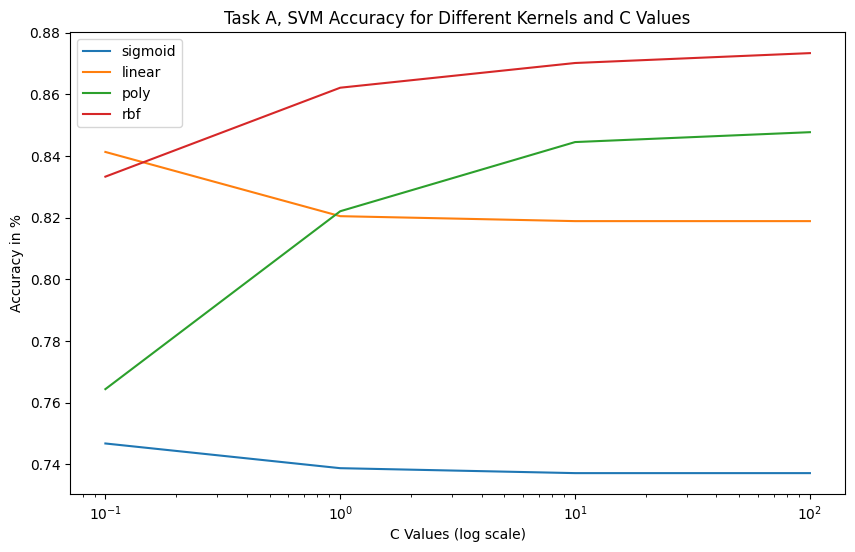

In [12]:
import pandas as pd
df_results = pd.DataFrame(accuracy_results)

fig, ax = plt.subplots(figsize=(10, 6))

for i in kernels:
    kernel_df = df_results[df_results['kernel'] == i]
    ax.plot(kernel_df['C'], kernel_df['accu'], label=i)

ax.set_xscale('log')

ax.set_xlabel('C Values (log scale)')
ax.set_ylabel('Accuracy in %')
ax.set_title('Task A, SVM Accuracy for Different Kernels and C Values')
ax.legend()
plt.show()

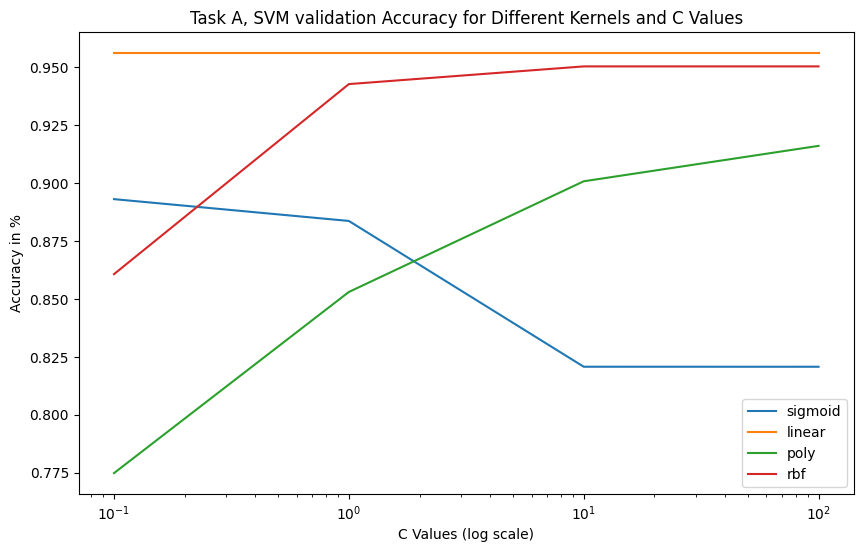

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))

for i in kernels:
    kernel_df = df_results[df_results['kernel'] == i]
    ax.plot(kernel_df['C'], kernel_df['valscore'], label=i)

ax.set_xscale('log')

ax.set_xlabel('C Values (log scale)')
ax.set_ylabel('Accuracy in %')
ax.set_title('Task A, SVM validation Accuracy for Different Kernels and C Values')
ax.legend()
plt.show()

In [ ]:
# Task A CNN method

%pip install tensorflow


In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [166]:
# Reshape the input data as CNN requires
inshape = (28, 28, 1)  # image length, width and channels, which is 28,28,1 in task A
train_reshaped = np.reshape(data_train, (data_train.shape[0],) + inshape)
val_reshaped = np.reshape(data_val, (data_val.shape[0],) + inshape)
test_reshaped = np.reshape(data_test, (data_test.shape[0],) + inshape)


In [170]:

# Define the CNN model
CNN_A = models.Sequential()

# Convolutional layers
CNN_A.add(layers.BatchNormalization())
CNN_A.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=inshape))
CNN_A.add(layers.MaxPooling2D((2, 2)))
CNN_A.add(layers.BatchNormalization())
CNN_A.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN_A.add(layers.MaxPooling2D((2, 2)))
CNN_A.add(layers.BatchNormalization())
CNN_A.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Fully connected layers
CNN_A.add(layers.Flatten())
CNN_A.add(layers.Dense(64, activation='relu'))
CNN_A.add(layers.Dense(1, activation='sigmoid'))  # As this is a binary classification

# Compile the model
CNN_A.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class classification
              metrics=['accuracy'])

# Define EarlyStopping callback, to perfent overfit
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)


In [171]:
# Train the model
result_cnna = CNN_A.fit(train_reshaped, label_train, epochs=66, validation_data=(val_reshaped, label_val),
                        callbacks = [early_stopping])

# Get the best validation accuracy from the training history
best_val_accuracy = max(result_cnna.history['val_accuracy'])
print("Best Validation Accuracy: {:.2f}%".format(best_val_accuracy * 100))

Epoch 1/66
148/148 [==============================] - 1s 6ms/step - loss: 0.1528 - accuracy: 0.9373 - val_loss: 1.9966 - val_accuracy: 0.6250
Epoch 2/66
148/148 [==============================] - 1s 5ms/step - loss: 0.0901 - accuracy: 0.9639 - val_loss: 1.3871 - val_accuracy: 0.6731
Epoch 3/66
148/148 [==============================] - 1s 5ms/step - loss: 0.0681 - accuracy: 0.9739 - val_loss: 1.2889 - val_accuracy: 0.7324
Epoch 4/66
148/148 [==============================] - 1s 5ms/step - loss: 0.0560 - accuracy: 0.9794 - val_loss: 0.4944 - val_accuracy: 0.8734
Epoch 5/66
148/148 [==============================] - 1s 5ms/step - loss: 0.0440 - accuracy: 0.9826 - val_loss: 0.7168 - val_accuracy: 0.8558
Epoch 6/66
148/148 [==============================] - 1s 5ms/step - loss: 0.0305 - accuracy: 0.9885 - val_loss: 0.8217 - val_accuracy: 0.8365
Epoch 7/66
148/148 [==============================] - 1s 5ms/step - loss: 0.0343 - accuracy: 0.9862 - val_loss: 0.3999 - val_accuracy: 0.9103
Epoch 

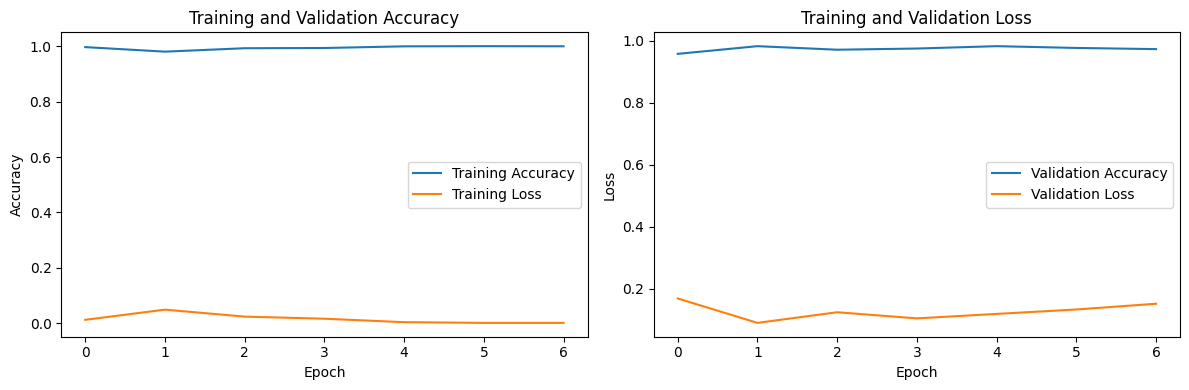

In [33]:
# Plotting accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(result_cnna.history['accuracy'], label='Training Accuracy')
plt.plot(result_cnna.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(result_cnna.history['val_accuracy'], label='Validation Accuracy')
plt.plot(result_cnna.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [172]:
maxaccu_cnna = max(result_cnna.history['val_accuracy'])
print(f'The best validation obtained is {maxaccu_cnna}')
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
result_cnn = np.round(CNN_A.predict(test_reshaped),0)
print("\nConfusion Matrix:")
print(confusion_matrix(label_test, result_cnn))
# accuracy = accuracy_score(label_test, result_cnn)
# print(f"Random Forest Accuracy: {accuracy}")
# Evaluate the model on the test data
test_loss, test_accuracy = CNN_A.evaluate(test_reshaped, label_test)
print(f"test accuracy is now {test_accuracy}")

The best validation obtained is 0.9102563858032227
20/20 [==============================] - 0s 1ms/step

Confusion Matrix:
[[195  39]
 [ 17 373]]
20/20 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.9103
test accuracy is now 0.9102563858032227


In [173]:
try:
    CNN_A.save(filepath= '../A/my_saved_model')
    print('Saving model; Success')
except:
    print('Saving model failed')

INFO:tensorflow:Assets written to: ../A/my_saved_model\assets


INFO:tensorflow:Assets written to: ../A/my_saved_model\assets


Saving model; Success


In [49]:
import pandas as pd

# Distribution check

df = pd.DataFrame(label_train)

# Display the count of each category
df.head()
category_counts = df[0].value_counts()
print(category_counts)

0
1    3494
0    1214
Name: count, dtype: int64


In [63]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have features X and labels y

# Create a Random Forest model
rf_modela = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_modela.fit(data_tr, label_train)

# Make predictions on the validation set
y_pred = rf_modela.predict(data_va)

# Evaluate the model
accu_rf = accuracy_score(label_val, y_pred)
print("Validation Accuracy:", accu_rf)

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(label_val, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(label_val, y_pred))

# Make predictions on the test set
y_pred = rf_modela.predict(data_te)

# Evaluate the model
accu_rf = accuracy_score(label_test, y_pred)
print("Validation Accuracy:", accu_rf)

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(label_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(label_test, y_pred))

Validation Accuracy: 0.9599236641221374

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       135
           1       0.96      0.99      0.97       389

    accuracy                           0.96       524
   macro avg       0.97      0.93      0.95       524
weighted avg       0.96      0.96      0.96       524


Confusion Matrix:
[[117  18]
 [  3 386]]
Validation Accuracy: 0.8509615384615384

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.65      0.76       234
           1       0.82      0.97      0.89       390

    accuracy                           0.85       624
   macro avg       0.88      0.81      0.83       624
weighted avg       0.86      0.85      0.84       624


Confusion Matrix:
[[151  83]
 [ 10 380]]
